In [1]:
# !pip install seaborn==0.11.2

In [2]:
from datetime import (
    datetime, date, timezone
)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme(style="whitegrid")

# 1. Служебные функции

In [4]:
def parse_date(value: str) -> date:
    if len(value) < 10:
        value = "0" + value
        
    return datetime.strptime(value, "%d.%m.%Y").date()


def get_subscribers_df_by_raw_data(raw_sub_data: dict) -> pd.DataFrame:
    sub_df = pd.DataFrame(raw_sub_data)
    
    sub_df["labels"] = sub_df["labels"].str.replace(
        " Feb", ".02.2022", regex=False
    ).str.replace(
        " Mar", ".03.2022", regex=False
    )
    
    sub_df["labels"] = sub_df["labels"].apply(parse_date)
    
    sub_df = sub_df[
        [
            "channel", "labels", "values"
        ]
    ]
    
    sub_df.columns = [
        "channel", "date", "subscribers"
    ]
    
    sub_df["subscribers_day_delta"] = sub_df["subscribers"] - sub_df["subscribers"].shift(1)

    return sub_df

# 2. Константы

In [5]:
MESSAGES_PARQUET_FILE = "../data/processed/messages.parquet"
COMMENTS_PARQUET_FILE = "../data/processed/comments.parquet"

THRESHOLD_DATE = datetime(
    2022, 3, 8, 0, 0, 0, 
    tzinfo=timezone.utc
)

# 3. Выгружаем данные

In [6]:
messages = pd.read_parquet(
    MESSAGES_PARQUET_FILE
)

messages = messages[
    (
        (
            messages["date"] < THRESHOLD_DATE
        )
        # & messages["legacy"]
    )
]

print(messages.shape)
messages.head(5)

(22413, 12)


,channel_name,channel_orientation,comments_unavailable,id,date,edit_date,message,views,forwards,media,legacy,comments_count
44,readovkanews,rus,False,27640,2022-03-07 21:11:57+00:00,2022-03-07 21:12:03+00:00,Россия объявляет «режим тишины» с 10:00 8 март...,190786.0,128.0,False,True,93
45,readovkanews,rus,False,27641,2022-03-07 21:16:57+00:00,2022-03-07 21:17:16+00:00,Путин предложил установить новые выплаты детям...,202091.0,467.0,False,True,198
46,readovkanews,rus,False,27635,2022-03-07 19:45:00+00:00,2022-03-07 19:45:08+00:00,​​Донецкая администрация повесила на здание по...,203113.0,755.0,True,True,176
47,readovkanews,rus,False,27644,2022-03-07 21:35:06+00:00,2022-03-07 21:35:20+00:00,Около Киева прогремел мощный взрыв \n\nПо непо...,181197.0,111.0,True,True,329
48,readovkanews,rus,False,27637,2022-03-07 20:22:21+00:00,2022-03-07 20:24:52+00:00,"США не будут против, если Польша передаст Укра...",202004.0,173.0,False,True,281


In [7]:
comments = pd.read_parquet(
    COMMENTS_PARQUET_FILE
)

comments = comments[
    comments["comment_date"] < THRESHOLD_DATE
]

print(comments.shape)
comments.head(5)

(386374, 8)


,channel_name,channel_orientation,message_id,comment_id,comment_date,comment_edit_date,comment_message,comment_media
10228,readovkanews,rus,27640,1671477,2022-03-07 22:34:41+00:00,NaT,"Может многие и не хотят, но это не значит, что...",False
10229,readovkanews,rus,27640,1671462,2022-03-07 22:32:25+00:00,NaT,"Он окруженный стоит, еще в городе не заходили....",False
10230,readovkanews,rus,27640,1671433,2022-03-07 22:26:33+00:00,NaT,Неважно куда сейчас . Речь о спасении жизни.,False
10231,readovkanews,rus,27640,1671424,2022-03-07 22:25:41+00:00,NaT,"Из Харькова многие не хотят выходить, просто н...",False
10232,readovkanews,rus,27640,1671410,2022-03-07 22:24:29+00:00,NaT,Такие вопросы должны решать военные обеих стор...,False


In [8]:
raw_subscribers_data = [
    {"channel": "nexta_live", "labels":["21 Feb","22 Feb","23 Feb","24 Feb","25 Feb","26 Feb","27 Feb","28 Feb","1 Mar","2 Mar","3 Mar","4 Mar","5 Mar","6 Mar","7 Mar"],"values":[819727,823449,823868,1063426,1266498,1420202,1542892,1609179,1647628,1675108,1690717,1702821,1715469,1724992,1732228],"values2":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]},
    {"channel": "voynareal", "labels":["21 Feb","22 Feb","23 Feb","24 Feb","25 Feb","26 Feb","27 Feb","28 Feb","1 Mar","2 Mar","3 Mar","4 Mar","5 Mar","6 Mar","7 Mar"],"values":[296839,314665,323072,483992,587579,676024,751616,789537,810938,821204,823369,824691,826389,829196,831643],"values2":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]},
    {"channel": "u_now", "labels":["21 Feb","22 Feb","23 Feb","24 Feb","25 Feb","26 Feb","27 Feb","28 Feb","1 Mar","2 Mar","3 Mar","4 Mar","5 Mar","6 Mar","7 Mar"],"values":[552785,560260,566251,711785,835949,936537,1013746,1064663,1092812,1115892,1138430,1151638,1165837,1173423,1179464],"values2":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]},
    {"channel": "readovkanews", "labels":["21 Feb","22 Feb","23 Feb","24 Feb","25 Feb","26 Feb","27 Feb","28 Feb","1 Mar","2 Mar","3 Mar","4 Mar","5 Mar","6 Mar","7 Mar"],"values":[297019,300505,303506,359195,408341,453800,521046,549777,576931,677170,694959,701877,706856,710292,714702],"values2":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]},
    {"channel": "bbbreaking", "labels":["21 Feb","22 Feb","23 Feb","24 Feb","25 Feb","26 Feb","27 Feb","28 Feb","1 Mar","2 Mar","3 Mar","4 Mar","5 Mar","6 Mar","7 Mar"],"values":[420065,430674,436126,653172,698619,725571,760885,794582,813335,830062,842943,853710,862216,867506,873602],"values2":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]},
    {"channel": "breakingmash", "labels":["21 Feb","22 Feb","23 Feb","24 Feb","25 Feb","26 Feb","27 Feb","28 Feb","1 Mar","2 Mar","3 Mar","4 Mar","5 Mar","6 Mar","7 Mar"],"values":[1034777,1039524,1039868,1209680,1290630,1330717,1362556,1381044,1394158,1402786,1410248,1414159,1417626,1420967,1424322],"values2":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]}
]

sub_dfs = []

for sub_raw_data in raw_subscribers_data:
    sub_df = get_subscribers_df_by_raw_data(sub_raw_data)
    
    sub_dfs.append(
        sub_df
    )
    
sub_dfs = pd.concat(sub_dfs).reset_index(drop=True)

sub_dfs

,channel,date,subscribers,subscribers_day_delta
0,nexta_live,2022-02-21,819727,NaN
1,nexta_live,2022-02-22,823449,3722.0
2,nexta_live,2022-02-23,823868,419.0
3,nexta_live,2022-02-24,1063426,239558.0
4,nexta_live,2022-02-25,1266498,203072.0
...,...,...,...,...
85,breakingmash,2022-03-03,1410248,7462.0
86,breakingmash,2022-03-04,1414159,3911.0
87,breakingmash,2022-03-05,1417626,3467.0
88,breakingmash,2022-03-06,1420967,3341.0


# 4. EDA

## 4.1. Базовые статистики

In [9]:
# количество постов в канале
messages_count = pd.DataFrame(
    messages.groupby(
        by=[
            "channel_orientation",
            "channel_name"
        ]
    )["channel_name"].count()
)

messages_count.columns = ["agg"]

messages_count

agg
channel_orientation channel_name      
rus                 bbbreaking    3070
                    breakingmash   916
                    readovkanews  1362
ukr                 nexta_live    4193
                    u_now         8012
                    voynareal     4860

In [10]:
# количество просмотров в канале
messages_views_sum = pd.DataFrame(
    messages.groupby(
        by=[
            "channel_orientation",
            "channel_name"
        ]
    )["views"].sum().astype(int)
)

messages_views_sum.columns = ["agg"]

messages_views_sum

agg
channel_orientation channel_name            
rus                 bbbreaking    1241608171
                    breakingmash   726083195
                    readovkanews   269263891
ukr                 nexta_live    3080485679
                    u_now         2660596573
                    voynareal     1558035680

In [11]:
# отношение просмотров к числу постов
views_count_ratio = messages_views_sum / messages_count
views_count_ratio

agg
channel_orientation channel_name               
rus                 bbbreaking    404432.628990
                    breakingmash  792667.243450
                    readovkanews  197697.423642
ukr                 nexta_live    734673.426902
                    u_now         332076.456940
                    voynareal     320583.473251

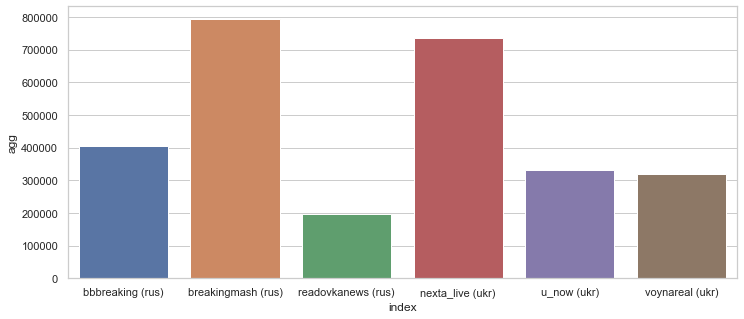

In [12]:
views_count_ratio_formatted_index = [
    f"{name} ({orient})" 
    for orient, name in views_count_ratio.index.values
]

views_count_ratio.index = views_count_ratio_formatted_index

figure = plt.figure(figsize=(12, 5))    

sns.barplot(
    x="index", y="agg", data=views_count_ratio.reset_index(), figure=figure
)

## 4.2. Рост дневных статистик с начала конфликта 
И незадолго до

In [13]:
plt.rc('axes', titlesize=13)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize

In [14]:
daily_stats = messages.groupby(
    by=[
        "channel_name",
        messages["date"].apply(
            lambda value: value.date()
        )
    ]
)[
    "channel_name", "views", "forwards", "media"
].agg(
    {
        "channel_name": "count",
        "views": "mean",
        "forwards": ["mean", "sum"],
        "media": "mean"
    }
)

daily_stats.columns = [
    "count", "views_mean", "forwards_mean", "forwards_sum", "media_mean"
]

daily_stats = daily_stats.reset_index()

print(daily_stats.shape)
daily_stats.head(5)

(84, 7)


/Users/erqups/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


,channel_name,date,count,views_mean,forwards_mean,forwards_sum,media_mean
0,bbbreaking,2022-02-22,255,189543.388235,467.407843,119189.0,0.149020
1,bbbreaking,2022-02-23,164,191879.945122,463.780488,76060.0,0.225610
2,bbbreaking,2022-02-24,533,338255.259398,1190.928571,633574.0,0.168856
3,bbbreaking,2022-02-25,294,408514.401361,1113.017007,327227.0,0.187075
4,bbbreaking,2022-02-26,146,450978.280822,1194.335616,174373.0,0.109589


In [15]:
daily_stats = pd.merge(
    daily_stats, sub_dfs, how="inner", 
    left_on=("date", "channel_name"), 
    right_on=("date", "channel")
)

del daily_stats["channel"]

print(daily_stats.shape)
daily_stats.head(5)

(84, 9)


,channel_name,date,count,views_mean,forwards_mean,forwards_sum,media_mean,subscribers,subscribers_day_delta
0,bbbreaking,2022-02-22,255,189543.388235,467.407843,119189.0,0.149020,430674,10609.0
1,bbbreaking,2022-02-23,164,191879.945122,463.780488,76060.0,0.225610,436126,5452.0
2,bbbreaking,2022-02-24,533,338255.259398,1190.928571,633574.0,0.168856,653172,217046.0
3,bbbreaking,2022-02-25,294,408514.401361,1113.017007,327227.0,0.187075,698619,45447.0
4,bbbreaking,2022-02-26,146,450978.280822,1194.335616,174373.0,0.109589,725571,26952.0


### 4.2.1. Количество постов
До начала конфликта у всех каналов было +- одно и то же количество дневных постов. После начала конфликта украинские каналы показывают резкое увеличение количества постов, российские же каналы реагируют более вяло. 

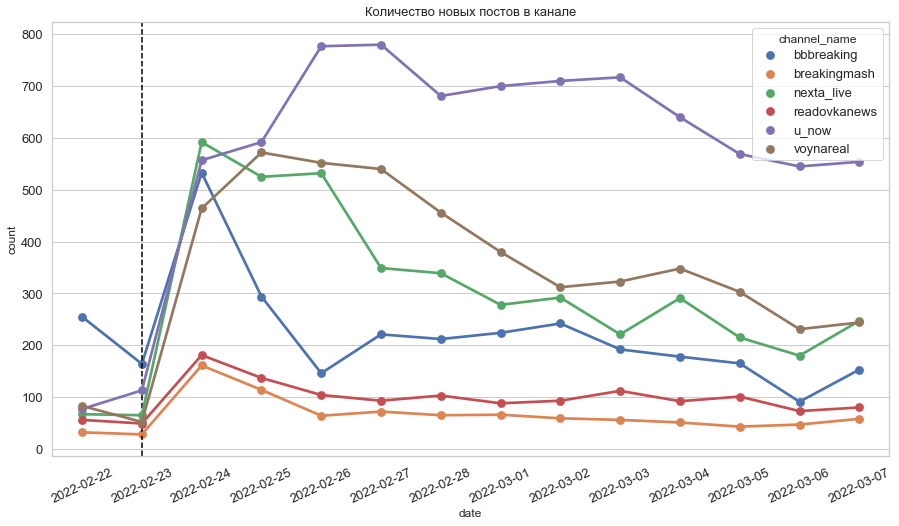

In [31]:
figure = plt.figure(figsize=(15, 8))  

plt.title("Количество новых постов в канале")
plt.xticks(rotation=25)
plt.axvline(
    x=1, color="black", linestyle="--"
)

sns.pointplot(
    data=daily_stats,
    x="date", y="count", 
    figure=figure,
    hue='channel_name',
    # color="black"
)

In [32]:
figure.savefig(
    '../docs/posts_counts.png', dpi=300
)

### 4.2.2. Среднее количество просмотров (охват)
В первые дни конфликта лидирует Mash из-за количество исходной аудитории, которая генерирует просмотры, но эту фору быстро отыгрывает NEXTA. 

Стоит также отметить канал bbreaking, который увеличивает отрыв от двух украинских каналов, которые постят более активно, чем он. 

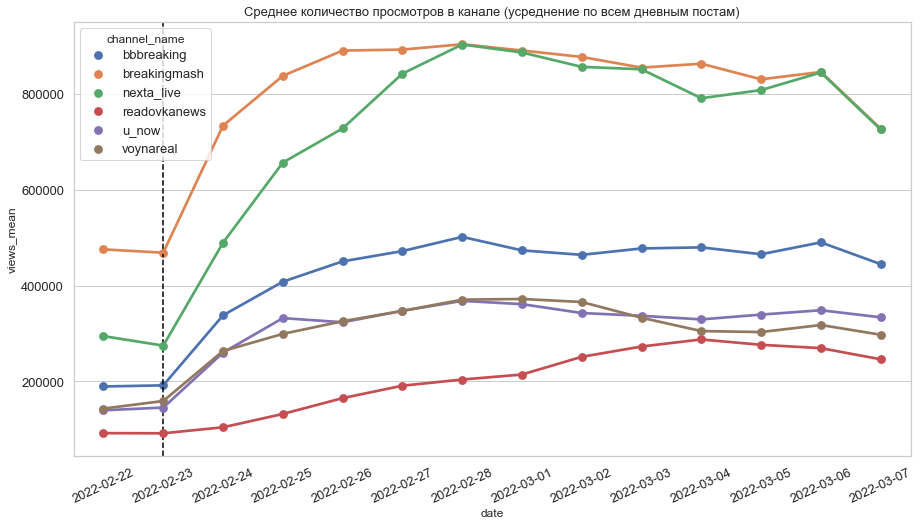

In [17]:
figure = plt.figure(figsize=(15, 8)) 

plt.title("Среднее количество просмотров в канале (усреднение по всем дневным постам)")
plt.xticks(rotation=25)
plt.axvline(
    x=1, color="black", linestyle="--"
)

sns.pointplot(
    data=daily_stats,
    x="date", y="views_mean", 
    figure=figure,
    hue='channel_name',
    # color="black"
)

### 4.2.3. Средняя пересылаемость постов
Тут Mash лидирует, так как количество постов у него маленькое. Интереснее смотреть на суммарное количество пересылаемых постов

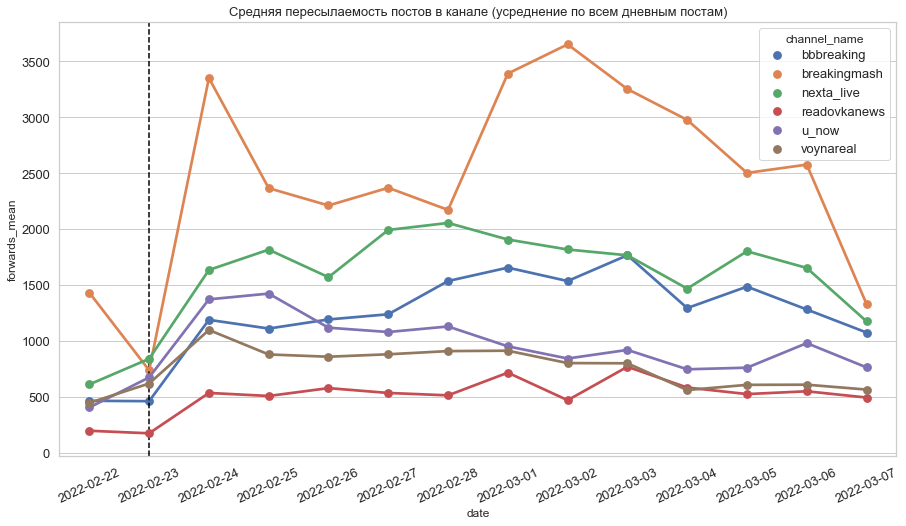

In [18]:
figure = plt.figure(figsize=(15, 8)) 

plt.title("Средняя пересылаемость постов в канале (усреднение по всем дневным постам)")
plt.xticks(rotation=25)
plt.axvline(
    x=1, color="black", linestyle="--"
)

sns.pointplot(
    data=daily_stats,
    x="date", y="forwards_mean", 
    figure=figure,
    hue='channel_name',
    # color="black"
)

### 4.2.4. Суммарная пересылаемость постов
До конфликта - цифры схожие, сразу после начала - лидирует NEXTA и украинский канал u_now. Интересно, что это два канала, по которым с первого дня виден резкий всплеск по количеству постов. 

Нужно отметить, что это один из самых важных показателей (особенно в первые дни конфликта, когда никто не знает где смотреть актуалные новости), который позволяет привлечь в канал новую аудиторию, т.к пересылают эти самые посты знакомым, коллегам, в другие каналы и т.п

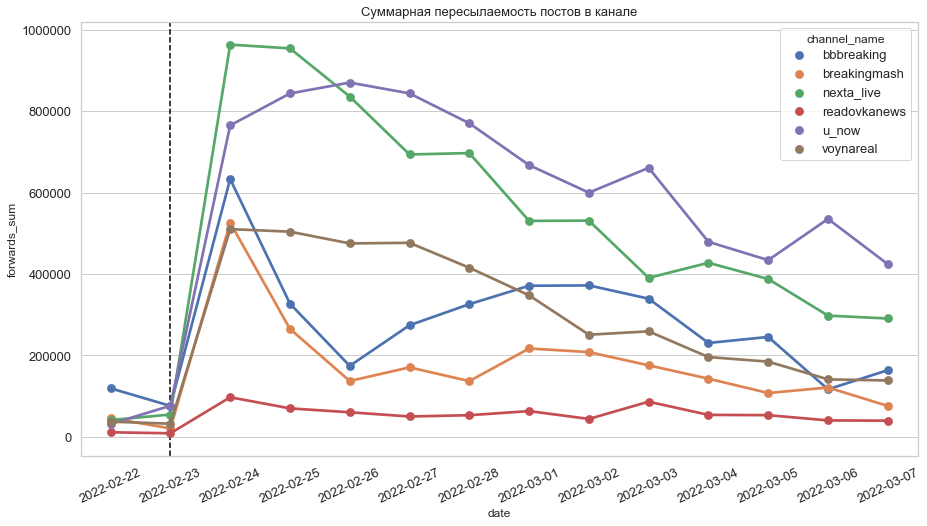

In [33]:
figure = plt.figure(figsize=(15, 8)) 

plt.title("Суммарная пересылаемость постов в канале")
plt.xticks(rotation=25)
plt.axvline(
    x=1, color="black", linestyle="--"
)

sns.pointplot(
    data=daily_stats,
    x="date", y="forwards_sum", 
    figure=figure,
    hue='channel_name',
    # color="black"
)

In [34]:
figure.savefig(
    '../docs/forwards_sum.png', dpi=300
)

### 4.2.5. Доля медиа постов

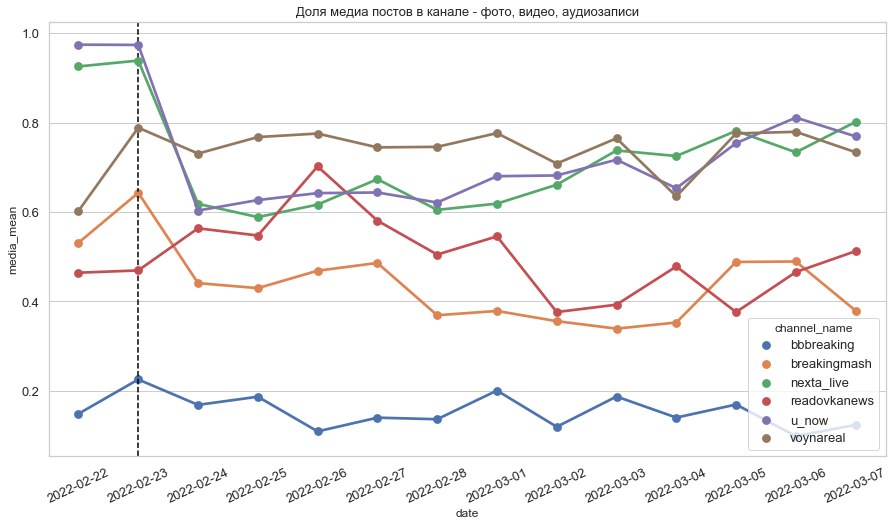

In [20]:
figure = plt.figure(figsize=(15, 8)) 

plt.title("Доля медиа постов в канале - фото, видео, аудиозаписи")
plt.xticks(rotation=25)
plt.axvline(
    x=1, color="black", linestyle="--"
)

sns.pointplot(
    data=daily_stats,
    x="date", y="media_mean", 
    figure=figure,
    hue='channel_name',
    # color="black"
)

### 4.2.6. Абсолютное количество подписчиков

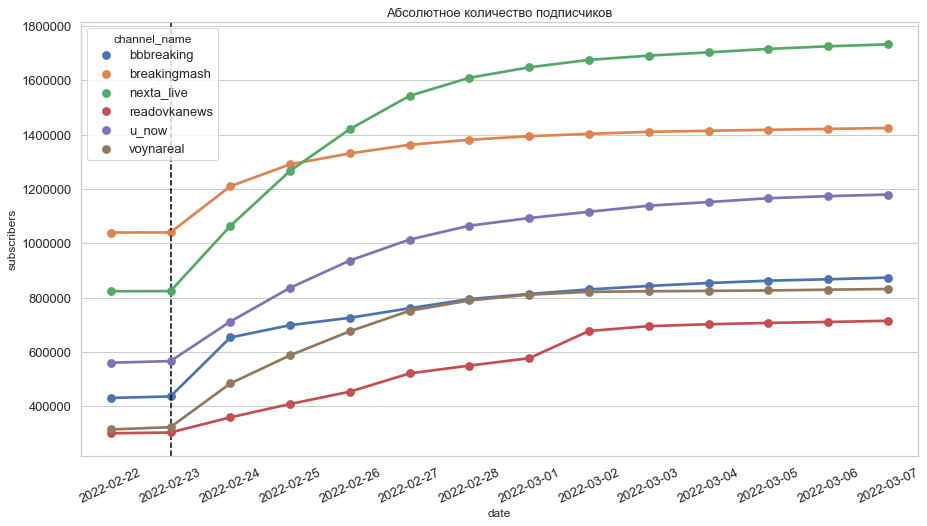

In [29]:
figure = plt.figure(figsize=(15, 8)) 

plt.title("Абсолютное количество подписчиков")
plt.xticks(rotation=25)
plt.axvline(
    x=1, color="black", linestyle="--"
)

sns.pointplot(
    data=daily_stats,
    x="date", y="subscribers", 
    figure=figure,
    hue='channel_name',
    # color="black"
)

In [30]:
figure.savefig(
    '../docs/subscribers_absolute.png', dpi=300
)

### 4.2.7. Прирост в абсолютном и процентном соотношениях

In [23]:
subscribers_min = daily_stats.groupby(
    by=["channel_name"]
)[
    "subscribers"
].min()

subscribers_max = daily_stats.groupby(
    by=["channel_name"]
)[
    "subscribers"
].max()

subscribers_comparsion = pd.merge(
    subscribers_min, subscribers_max, 
    left_index=True, right_index=True
)

subscribers_comparsion.columns = ["min", "max"]

subscribers_comparsion["percent_increase"] = round(
    subscribers_comparsion["max"] / subscribers_comparsion["min"] * 100
)

subscribers_comparsion.sort_values("min", ascending=False)

,min,max,percent_increase
channel_name,,,
breakingmash,1039524,1424322,137.0
nexta_live,823449,1732228,210.0
u_now,560260,1179464,211.0
bbbreaking,430674,873602,203.0
voynareal,314665,831643,264.0
readovkanews,300505,714702,238.0


### 4.2.8. Прирост подписчиков (дневная дельта)

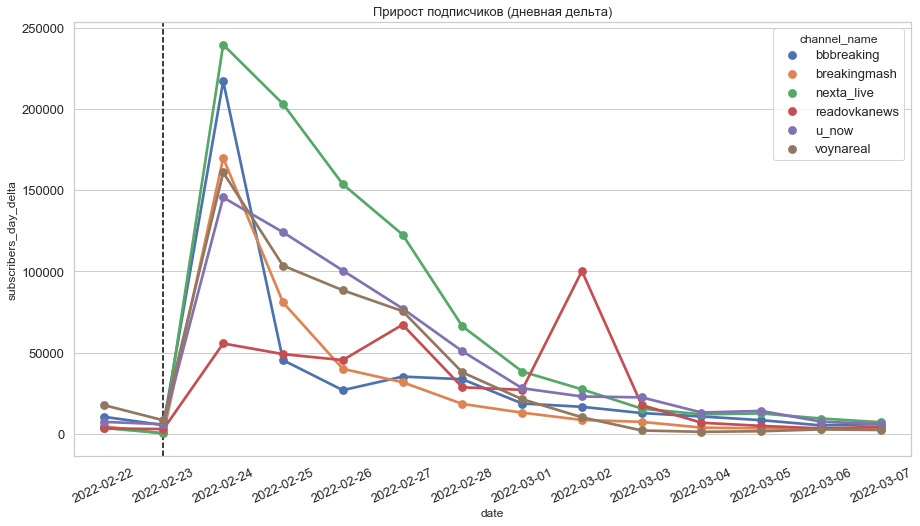

In [35]:
figure = plt.figure(figsize=(15, 8)) 

plt.title("Прирост подписчиков (дневная дельта)")
plt.xticks(rotation=25)
plt.axvline(
    x=1, color="black", linestyle="--"
)

sns.pointplot(
    data=daily_stats,
    x="date", y="subscribers_day_delta", 
    figure=figure,
    hue='channel_name',
    # color="black"
)

In [36]:
figure.savefig(
    '../docs/subscribers_delta.png', dpi=300
)

### Подитог пунктов с подписчиками
В первые дни конфликта, когда никто не знает где смотреть новости, имеет значение общий охват - он складывается из исходной аудитории и количества пересланных сообщений. 

Примерно через неделю бОльшая часть аудитории находит удобный набор источников и рост аудитории сходит на нет. 

NEXTA выбрала стратегию написания огромного количества новостей в первые дни, за счет чего получила высокую пересылаемость, которая конвертировалась в подписчиков. За счет этого она смогла обогнать канал Mash, исходная аудитория которого изначално была выше. 

С учетом того, что NEXTA продолжает публиковать большое кол-во постов в день, ее суммарная пересылаемость растет, в то же время у Mash - падает. По итогу получаем рост подписчиков и информационного охвата первого канала и стагнацию второго. 

Похожая логика видится при сравнении каналов readovkanews и voynareal, которые начинали с практически одинакого количества подписчиков.

Также косвенную роль может играть доля медиаконтента - фото или видео с места событий охотнее перешлют, чем текстовую заметку.

### 4.2.9. Корреляция факторов в первый день конфликта
Дневной прирост подписчиков коррелирует с количеством постов, суммарным количеством пересылок и начальным количеством подписчиков

In [25]:
daily_stats_to_corr = daily_stats[
    [
        "subscribers_day_delta",
        "count", "media_mean", 
        "forwards_mean", "forwards_sum",
        "views_mean", "subscribers",
        "date", "channel_name"
    ]
]

daily_stats_to_corr = daily_stats_to_corr[
    (
        daily_stats_to_corr["date"] > datetime(
            2022, 2, 23, 0, 0, 0, 
            tzinfo=timezone.utc
        ).date()
    ) 
    & (
        daily_stats_to_corr["date"] < datetime(
            2022, 2, 25, 0, 0, 0, 
            tzinfo=timezone.utc
        ).date()
    )
    
]

daily_stats_to_corr

,subscribers_day_delta,count,media_mean,forwards_mean,forwards_sum,views_mean,subscribers,date,channel_name
2,217046.0,533,0.168856,1190.928571,633574.0,338255.259398,653172,2022-02-24,bbbreaking
16,169812.0,161,0.440994,3352.337580,526317.0,734645.675159,1209680,2022-02-24,breakingmash
30,239558.0,592,0.618243,1636.473684,963883.0,490028.281834,1063426,2022-02-24,nexta_live
44,55689.0,181,0.563536,537.381215,97266.0,104266.359116,359195,2022-02-24,readovkanews
58,145534.0,557,0.603232,1374.034111,765337.0,260344.219031,711785,2022-02-24,u_now
72,160920.0,464,0.730603,1100.174569,510481.0,263621.467672,483992,2022-02-24,voynareal


In [26]:
del daily_stats_to_corr["date"]
del daily_stats_to_corr["channel_name"]

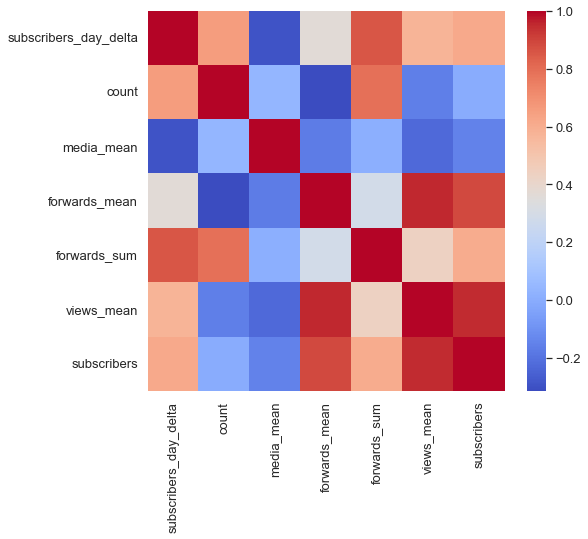

In [27]:
plt.figure(figsize=(8, 7))
sns.heatmap(
    daily_stats_to_corr.corr(), cmap=plt.get_cmap('coolwarm')
)